In [2]:
#import urllib.request
#image_url = 'http://yann.lecun.com/exdb/mnist/'
#urllib.request.urlretrieve(image_url,'/Users/jaekim/Downloads/train.gz')

import numpy as np
import pandas as pd
import matplotlib.pyplot as pyplot
import matplotlib as mpl

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import SGDClassifier

In [3]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame = True)

In [4]:
mnist_data = pd.concat([mnist['target'], mnist['data']], axis =1)
mnist_data.head()

,class,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
y = mnist_data['class'].astype(float)
x = mnist_data.drop('class', axis = 1 )
y = y[:60000]
x = x[:60000]
y = pd.get_dummies(y)

In [6]:
y

,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
0,0,0,0,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,1,0
59996,0,0,0,1,0,0,0,0,0,0
59997,0,0,0,0,0,1,0,0,0,0
59998,0,0,0,0,0,0,1,0,0,0


In [7]:
y.to_numpy()

array([[0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]], dtype=uint8)

# Redone HW below:

In [8]:
from keras.datasets import mnist

In [9]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [10]:
print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))
train_y[:10]

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

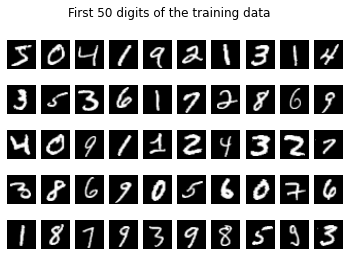

In [11]:
for i in range(50):  
    pyplot.subplot(5,10, 1+i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.axis("off")
pyplot.suptitle('First 50 digits of the training data')
pyplot.show()


In [23]:
## Construct y matrix

#y = pd.get_dummies(train_y)

#d = d.reindex(columns = [col for col in d.columns if col != '0'] + ['0'])
#y = y.transpose()


y = np.zeros((60000, 10))
for k in range(60000):
    y[k, train_y[k]] = 1
y[:5, :]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [24]:
#d.loc[:, [0,1,2]]
#y = y.to_numpy()
print(y.shape)

(60000, 10)


In [26]:
## Construct Theta

#X_data = np.zeros([28*28, 60000])
#for i in range (60000):
 #   a = np.array(train_X[i]).flatten()
  #  a = a.T
   # X_data[:, i] = a
img = train_X

A = img.reshape( img.shape[0], (img.shape[1]*img.shape[2]))
#phi = phi.transpose()
print(A.shape)

(60000, 784)


In [31]:
# Least square fit
def LeastSquare(func):
    a1 = np.linalg.pinv(A) @ func
    return a1


In [32]:
## Solve AX=B, in our case Ax = y

x1 = np.zeros((784,10))
for k in range(10):
    x1[:,k] = LeastSquare(y[:,k])
    